In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
import sys

In [4]:
sys.path.append('../')

In [5]:
from bbox_utils.bbox import generate_default_boxes, generate_default_boxes, rotateRectangle
from src.config import *

In [6]:
from numbaClipping import getIOU, getIOUOverallDefaultBox

In [7]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 1

In [8]:
prior_boxes = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

prior_boxes= np.array(prior_boxes, dtype=np.float64) * 300

In [9]:
len(prior_boxes)

36320

In [10]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000036.txt') as f:
    data = f.readlines()

In [11]:
data = data[0].split(',')
gt_box = list(map(float, data))
gt_box = gt_box[1:]

In [12]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000000110.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


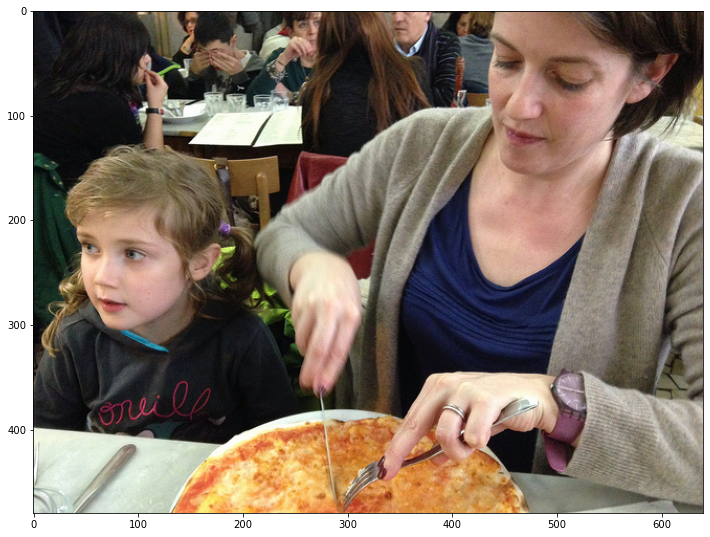

In [13]:
plt.imshow(image)

In [ ]:
# for i in range(0, 8, 2):
#     gt_box[i] = gt_box[i] / height

# for i in range(1, 8, 2):
#     gt_box[i] = gt_box[i] / width

In [ ]:
gt_box

In [ ]:
gt_box = [0.523058530183727, 0.65878784, 0.6034454068241469, 0.5107554, 0.7110888976377953, 0.54469654, 0.6307020209973754, 0.692729]

In [ ]:
np.array(gt_box) * 300

In [ ]:
gt_box = np.array(gt_box)

gt_box = gt_box.reshape(4, 2)

prior_boxes= np.array(prior_boxes, dtype=np.float64)

for i in range(len(prior_boxes)):
    
    iou = getIOU(prior_boxes[i], gt_box)
    
    if iou > 0.5:
    
        corners = np.array(prior_boxes[i]) * 300

        corners = corners.astype(np.int32)

        corners = corners.reshape(4, 2)

        corners = corners.reshape((-1, 1, 2))

        image = cv2.polylines(image, [corners],
                              True, color, 1)

        
corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000049.txt') as f:
    data = f.readlines()
    
print(data)

In [ ]:
getIOU(prior_boxes[i], gt_box)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


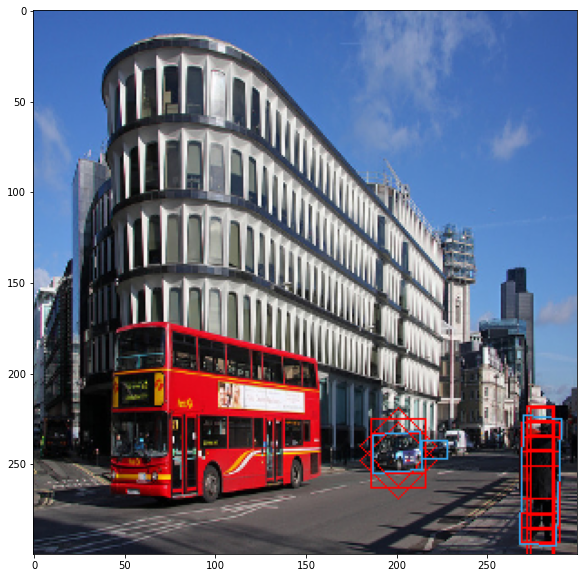

In [14]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000002089.txt') as f:
    datas = f.readlines()
    
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000002089.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (300, 300))

for i in range(len(datas)):
    data = datas[i].split(',')
    gt_box = list(map(float, data))
    gt_box = gt_box[1:]
    
    for i in range(0, 8, 2):
        gt_box[i] = gt_box[i] / height

    for i in range(1, 8, 2):
        gt_box[i] = gt_box[i] / width

    gt_box = np.array(gt_box, dtype=np.float64) * 300
            
    result = getIOUOverallDefaultBox(prior_boxes, gt_box)
    
    for i in range(len(result)):

        if result[i] > 0.5:

            corners = np.array(prior_boxes[i])

            corners = corners.astype(np.int32)

            corners = corners.reshape(4, 2)

            corners = corners.reshape((-1, 1, 2))

            image = cv2.polylines(image, [corners],
                                  True, color, 1)

        
    corners = np.array(gt_box)

    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
datas

In [ ]:
x = [587.18286,328.64633,602.2195,326.97562,604.62195,348.59756,589.5853,350.26828]

width = ( max(x[0], x[2], x[4], x[6]) + min(x[0], x[2], x[4], x[6]) ) / 2

height = ( max(x[1], x[3], x[5], x[7]) + min(x[1], x[3], x[5], x[7]) ) / 2

width, height

In [ ]:
width / height

In [ ]:
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000001390.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corners = np.array(x)

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, color, 2)

plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
result = getIOUOverallDefaultBox(prior_boxes, gt_box)

In [ ]:
result

In [ ]:
with open('/Users/usmanr/workspace/rotatedBoxes_Inputs/input/train/COCO_train2014_000000000036.txt') as f:
    data = f.readlines()
    
image = cv2.imread('/Users/usmanr/fiftyone/coco-2014/train/data/COCO_train2014_000000000036.jpg')

width = image.shape[0]
height = image.shape[1]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (300, 300))

data = data[0].split(',')
gt_box = list(map(float, data))
gt_box = gt_box[1:]

for i in range(0, 8, 2):
    gt_box[i] = gt_box[i] / height

for i in range(1, 8, 2):
    gt_box[i] = gt_box[i] / width
    
gt_box = np.array(gt_box)

gt_box = gt_box.reshape(4, 2)

prior_boxes= np.array(prior_boxes, dtype=np.float64)

for i in range(1000, 1050, 1):
    corners = np.array(prior_boxes[i])

    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, color, 1)

        
corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (52, 164, 235), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
np.array(prior_boxes[i])

In [ ]:
x[:-1]

In [ ]:
number_of_feature_maps = 6
def calculate_scale_of_default_boxes(k, m, s_max = 0.95, s_min = 0.2):
    return s_min + (s_max - s_min) * (k - 1) / (m - 1)

for k, f_k in enumerate(feature_map_shapes):
    s_k = calculate_scale_of_default_boxes(k, m = number_of_feature_maps, s_max = 0.8, s_min = 0.2)
    print(s_k)
    s_k_prime = np.sqrt(abs(s_k * calculate_scale_of_default_boxes(k + 1, m = 6)))

In [ ]:
prior_boxes = []

cx = 0.5
cy = 0.5

s_max = 0.7
s_min = 0.03

for k, f_k in enumerate(feature_map_shapes):
    if k == 1:
        s_k = calculate_scale_of_default_boxes(k + 1, m = number_of_feature_maps, s_max=s_max, s_min=s_min)
        s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = number_of_feature_maps, 
                                                                   s_max=s_max, s_min=s_min))

         # for the square box don't rotate by 90
#         for angle in angles[:-1]:
#             prior_boxes.append(rotateRectangle(cx, cy, s_k, s_k, angle, 'deg'))
#             prior_boxes.append(rotateRectangle(cx, cy, s_k_prime, s_k_prime, angle, 'deg'))

#         for angle in angles:
#             prior_boxes.append(rotateRectangle(cx, cy, s_k, s_k_prime, angle, 'deg'))

        for ar in aspect_ratios[k]:
            for angle in [0]:
                prior_boxes.append(rotateRectangle(cx, cy, s_k*np.sqrt(ar), s_k/np.sqrt(ar), angle, 'deg'))
                prior_boxes.append(rotateRectangle(cx, cy, s_k_prime*np.sqrt(ar), s_k_prime/np.sqrt(ar), angle, 'deg'))
            
prior_boxes = np.array(prior_boxes) * 300

In [ ]:
len(prior_boxes)

In [ ]:
image = np.zeros((300, 300, 3))

for corners in prior_boxes:
    corners = corners.astype(np.int32)

    corners = corners.reshape(4, 2)

    corners = corners.reshape((-1, 1, 2))

    image = cv2.polylines(image, [corners],
                          True, color, 1)
    
plt.figure(figsize=(10,10))

plt.imshow(image)

In [ ]:
1/6

In [ ]:
3/4

In [ ]:
15 / 0.4

In [ ]:
38 *